In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar
from scipy.optimize import curve_fit

In [96]:
#  load main data for layers

folder = "data_io_direct_random/"
analysis_type = "direct"
xlabel = r"direct click probability $p$"

!ls "$folder"

dat_N_12_Nl_1_p_0.000000_S_1__0.txt   dat_N_24_Nl_1_p_1.000000_S_2__2.txt
dat_N_12_Nl_1_p_0.000000_S_1__1.txt   dat_N_24_Nl_1_p_1.000000_S_2__20.txt
dat_N_12_Nl_1_p_0.000000_S_1__10.txt  dat_N_24_Nl_1_p_1.000000_S_2__21.txt
dat_N_12_Nl_1_p_0.000000_S_1__11.txt  dat_N_24_Nl_1_p_1.000000_S_2__22.txt
dat_N_12_Nl_1_p_0.000000_S_1__12.txt  dat_N_24_Nl_1_p_1.000000_S_2__23.txt
dat_N_12_Nl_1_p_0.000000_S_1__13.txt  dat_N_24_Nl_1_p_1.000000_S_2__24.txt
dat_N_12_Nl_1_p_0.000000_S_1__14.txt  dat_N_24_Nl_1_p_1.000000_S_2__25.txt
dat_N_12_Nl_1_p_0.000000_S_1__15.txt  dat_N_24_Nl_1_p_1.000000_S_2__26.txt
dat_N_12_Nl_1_p_0.000000_S_1__16.txt  dat_N_24_Nl_1_p_1.000000_S_2__27.txt
dat_N_12_Nl_1_p_0.000000_S_1__17.txt  dat_N_24_Nl_1_p_1.000000_S_2__28.txt
dat_N_12_Nl_1_p_0.000000_S_1__18.txt  dat_N_24_Nl_1_p_1.000000_S_2__29.txt
dat_N_12_Nl_1_p_0.000000_S_1__19.txt  dat_N_24_Nl_1_p_1.000000_S_2__3.txt
dat_N_12_Nl_1_p_0.000000_S_1__2.txt   dat_N_24_Nl_1_p_1.000000_S_2__30.txt
dat_N_12_Nl_1_p_0.000000_S_

dat_N_12_Nl_2_p_0.700000_S_1__56.txt  dat_N_24_Nl_3_p_0.900000_S_3__70.txt
dat_N_12_Nl_2_p_0.700000_S_1__57.txt  dat_N_24_Nl_3_p_0.900000_S_3__71.txt
dat_N_12_Nl_2_p_0.700000_S_1__58.txt  dat_N_24_Nl_3_p_0.900000_S_3__72.txt
dat_N_12_Nl_2_p_0.700000_S_1__59.txt  dat_N_24_Nl_3_p_0.900000_S_3__73.txt
dat_N_12_Nl_2_p_0.700000_S_1__6.txt   dat_N_24_Nl_3_p_0.900000_S_3__74.txt
dat_N_12_Nl_2_p_0.700000_S_1__60.txt  dat_N_24_Nl_3_p_0.900000_S_3__75.txt
dat_N_12_Nl_2_p_0.700000_S_1__61.txt  dat_N_24_Nl_3_p_0.900000_S_3__76.txt
dat_N_12_Nl_2_p_0.700000_S_1__62.txt  dat_N_24_Nl_3_p_0.900000_S_3__77.txt
dat_N_12_Nl_2_p_0.700000_S_1__63.txt  dat_N_24_Nl_3_p_0.900000_S_3__78.txt
dat_N_12_Nl_2_p_0.700000_S_1__64.txt  dat_N_24_Nl_3_p_0.900000_S_3__79.txt
dat_N_12_Nl_2_p_0.700000_S_1__65.txt  dat_N_24_Nl_3_p_0.900000_S_3__8.txt
dat_N_12_Nl_2_p_0.700000_S_1__66.txt  dat_N_24_Nl_3_p_0.900000_S_3__80.txt
dat_N_12_Nl_2_p_0.700000_S_1__67.txt  dat_N_24_Nl_3_p_0.900000_S_3__81.txt
dat_N_12_Nl_2_p_0.700000_S

dat_N_16_Nl_1_p_0.200000_S_4__83.txt  dat_N_28_Nl_2_p_0.600000_S_1__18.txt
dat_N_16_Nl_1_p_0.200000_S_4__84.txt  dat_N_28_Nl_2_p_0.600000_S_1__19.txt
dat_N_16_Nl_1_p_0.200000_S_4__85.txt  dat_N_28_Nl_2_p_0.600000_S_1__2.txt
dat_N_16_Nl_1_p_0.200000_S_4__86.txt  dat_N_28_Nl_2_p_0.600000_S_1__20.txt
dat_N_16_Nl_1_p_0.200000_S_4__87.txt  dat_N_28_Nl_2_p_0.600000_S_1__21.txt
dat_N_16_Nl_1_p_0.200000_S_4__88.txt  dat_N_28_Nl_2_p_0.600000_S_1__22.txt
dat_N_16_Nl_1_p_0.200000_S_4__89.txt  dat_N_28_Nl_2_p_0.600000_S_1__23.txt
dat_N_16_Nl_1_p_0.200000_S_4__9.txt   dat_N_28_Nl_2_p_0.600000_S_1__24.txt
dat_N_16_Nl_1_p_0.200000_S_4__90.txt  dat_N_28_Nl_2_p_0.600000_S_1__25.txt
dat_N_16_Nl_1_p_0.200000_S_4__91.txt  dat_N_28_Nl_2_p_0.600000_S_1__26.txt
dat_N_16_Nl_1_p_0.200000_S_4__92.txt  dat_N_28_Nl_2_p_0.600000_S_1__27.txt
dat_N_16_Nl_1_p_0.200000_S_4__93.txt  dat_N_28_Nl_2_p_0.600000_S_1__28.txt
dat_N_16_Nl_1_p_0.200000_S_4__94.txt  dat_N_28_Nl_2_p_0.600000_S_1__29.txt
dat_N_16_Nl_1_p_0.200000_S

dat_N_16_Nl_3_p_0.000000_S_2__54.txt  dat_N_32_Nl_1_p_0.700000_S_3__87.txt
dat_N_16_Nl_3_p_0.000000_S_2__55.txt  dat_N_32_Nl_1_p_0.700000_S_3__88.txt
dat_N_16_Nl_3_p_0.000000_S_2__56.txt  dat_N_32_Nl_1_p_0.700000_S_3__89.txt
dat_N_16_Nl_3_p_0.000000_S_2__57.txt  dat_N_32_Nl_1_p_0.700000_S_3__9.txt
dat_N_16_Nl_3_p_0.000000_S_2__58.txt  dat_N_32_Nl_1_p_0.700000_S_3__90.txt
dat_N_16_Nl_3_p_0.000000_S_2__59.txt  dat_N_32_Nl_1_p_0.700000_S_3__91.txt
dat_N_16_Nl_3_p_0.000000_S_2__6.txt   dat_N_32_Nl_1_p_0.700000_S_3__92.txt
dat_N_16_Nl_3_p_0.000000_S_2__60.txt  dat_N_32_Nl_1_p_0.700000_S_3__93.txt
dat_N_16_Nl_3_p_0.000000_S_2__61.txt  dat_N_32_Nl_1_p_0.700000_S_3__94.txt
dat_N_16_Nl_3_p_0.000000_S_2__62.txt  dat_N_32_Nl_1_p_0.700000_S_3__95.txt
dat_N_16_Nl_3_p_0.000000_S_2__63.txt  dat_N_32_Nl_1_p_0.700000_S_3__96.txt
dat_N_16_Nl_3_p_0.000000_S_2__64.txt  dat_N_32_Nl_1_p_0.700000_S_3__97.txt
dat_N_16_Nl_3_p_0.000000_S_2__65.txt  dat_N_32_Nl_1_p_0.700000_S_3__98.txt
dat_N_16_Nl_3_p_0.000000_S

dat_N_20_Nl_1_p_0.700000_S_4__81.txt  dat_N_32_Nl_3_p_1.000000_S_1__89.txt
dat_N_20_Nl_1_p_0.700000_S_4__82.txt  dat_N_32_Nl_3_p_1.000000_S_1__9.txt
dat_N_20_Nl_1_p_0.700000_S_4__83.txt  dat_N_32_Nl_3_p_1.000000_S_1__90.txt
dat_N_20_Nl_1_p_0.700000_S_4__84.txt  dat_N_32_Nl_3_p_1.000000_S_1__91.txt
dat_N_20_Nl_1_p_0.700000_S_4__85.txt  dat_N_32_Nl_3_p_1.000000_S_1__92.txt
dat_N_20_Nl_1_p_0.700000_S_4__86.txt  dat_N_32_Nl_3_p_1.000000_S_1__93.txt
dat_N_20_Nl_1_p_0.700000_S_4__87.txt  dat_N_32_Nl_3_p_1.000000_S_1__94.txt
dat_N_20_Nl_1_p_0.700000_S_4__88.txt  dat_N_32_Nl_3_p_1.000000_S_1__95.txt
dat_N_20_Nl_1_p_0.700000_S_4__89.txt  dat_N_32_Nl_3_p_1.000000_S_1__96.txt
dat_N_20_Nl_1_p_0.700000_S_4__9.txt   dat_N_32_Nl_3_p_1.000000_S_1__97.txt
dat_N_20_Nl_1_p_0.700000_S_4__90.txt  dat_N_32_Nl_3_p_1.000000_S_1__98.txt
dat_N_20_Nl_1_p_0.700000_S_4__91.txt  dat_N_32_Nl_3_p_1.000000_S_1__99.txt
dat_N_20_Nl_1_p_0.700000_S_4__92.txt  dat_N_32_Nl_3_p_1.000000_S_2__0.txt
dat_N_20_Nl_1_p_0.700000_S_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [101]:
#v_N = np.array([8,12,16,20,24,28,32,36,40])
v_N = np.array([8,12,16,20,24,28,32])
v_p = np.array([0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
v_D = np.array([2])
v_S = np.array([1,2,3,4])

N_collect = 99

prefix = "dat"
suffix = ".txt"

N_N = v_N.size
N_p = v_p.size
N_D = v_D.size
N_S = v_S.size

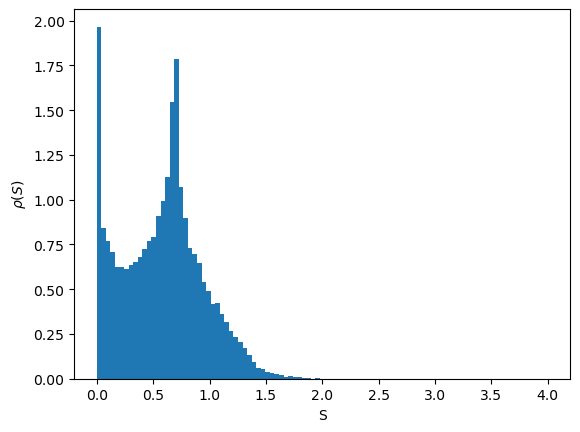

In [83]:
# plot distribution single value to check for truncation
N = 32
D = 2
p = 0.
S = 1
i_start = 20

S_max = 4.
N_bins = 100

# range of time points
v_i = range(i_start,N_collect+1)

num = 0
dat_S = []
for i in v_i:
    fn = (folder + prefix + "_N_" + str(N) + "_Nl_" + str(D) + "_p_" + "{:.6f}".format(p) 
           + "_S_" + str(S) + "__" + str(i) + suffix )
    
    try:
        data = np.loadtxt(fn)
    except:
        data = None
        
    if not data is None:
        dat_S += list( data[:,N//2] )

bins = np.linspace(0.,S_max,N_bins )
_=plt.hist( dat_S, bins=bins, density=True )
plt.xlabel("S")
plt.ylabel(r"$\rho(S)$")
#plt.savefig("S_distr_random.pdf")

## Load text and save as numpy

In [84]:
# skip if data already saved

data_list = []
err_list = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p*N_D*N_S, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N_D,N_S,N_collect+1,N+1))
    err_N = np.zeros((N_p,N_D,N_S,N_collect+1,N+1))
    num_N = np.zeros((N_p,N_D,N_S,N_collect))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i_D in range(N_D):
            D = v_D[i_D]
            for i_S in range(N_S):
                S = v_S[i_S]
                for i in range(N_collect):
                    fn = (folder + prefix + "_N_" + str(N) + "_Nl_" + str(D) + "_p_" + "{:.6f}".format(p) 
                           + "_S_" + str(S) + "__" + str(i) + suffix )

                    try:
                        data = np.loadtxt(fn)
                    except:
                        data = -np.ones(2,N+1)
                        print("Not found: " + fn)

                    num_N[i_p,i_D,i_S,i] = data.shape[0]

                    dat_N[i_p,i_D,i_S,i+1,:] = np.mean(data,axis=0)
                    err_N[i_p,i_D,i_S,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i_D,i_S,i])
            
                count += 1
                bar.update(count)


    data_list.append(dat_N)
    err_list.append(err_N)
    num_list.append(num_N)

bar.finish()
    
#outfile = folder + "save" + "_N_" + str(N_spin) + "_Ns_" + str(N_sample)
#np.save(outfile, full_data)

[========================================================================] 100%


In [85]:
# save data loaded from text files

np.savez(folder + "data.npz", *data_list)
np.savez(folder + "err.npz", *err_list)
np.savez(folder + "num.npz", *num_list)

## Load saved numpy data

In [98]:
# load data that were saved

l_data = np.load(folder + "data.npz")
l_err = np.load(folder + "err.npz")
l_num = np.load(folder + "num.npz")

data_list = [l_data[k] for k in l_data]
err_list = [l_err[k] for k in l_err]
num_list = [l_num[k] for k in l_num]

Text(0.5, 1.0, 'N=32')

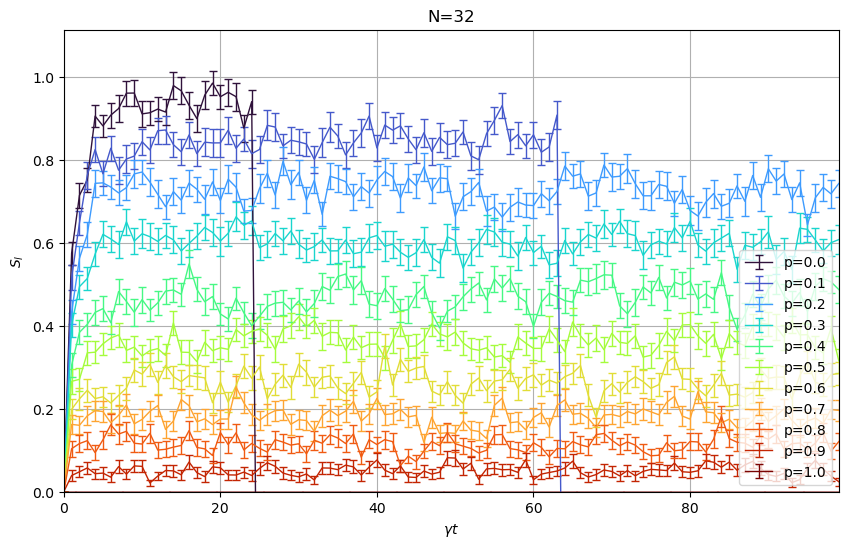

In [99]:
N_plot = 32
D_plot = 1
S_plot = 1


i_site = (N_plot)//2

plt.figure(figsize=(10,6))

i_N = np.argmin(np.abs(v_N-N_plot))
i_D = np.argmin(np.abs(v_D-D_plot))
i_S = np.argmin(np.abs(v_S-S_plot))

x_axis = np.linspace(0,N_collect,N_collect+1)
cmap = matplotlib.cm.turbo

for i_p, p in list(enumerate(v_p)):
    dat = data_list[i_N][i_p,i_D,i_S,:,i_site]
    err = err_list[i_N][i_p,i_D,i_S,:,i_site]

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=cmap(p/np.max(v_p)), label="p="+str(p))
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_collect)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel(r"$\gamma t$")
plt.ylabel(r"$S_l$")
plt.legend(loc="lower right")
plt.title("N="+str(N_plot))

#plt.savefig("St_half_" + str(N_plot) + ".png")

In [102]:
# obtain mean after time averaging

i_conv = 15

#N_N = len(data_list)
#N_p, N_D, N_S, N_i = data_list[0].shape

mean_S = []
err_S = []
for i in range(N_N):
    dat = data_list[i]
    err = err_list[i]
    
    temp_mean = np.zeros((N_p,N_D,N_S,v_N[i]+1))
    temp_err = np.zeros((N_p,N_D,N_S,v_N[i]+1))
    for i_p in range(N_p):
        for i_D in range(N_D):
            for i_S in range(N_S):
                end = np.max((dat[i_p,i_D,i_S,:,v_N[i]//2] > -1.).nonzero())
                if end >= i_conv:
                    temp_mean[i_p,i_D,i_S] = np.mean(dat[i_p,i_D,i_S,i_conv:end,:],0)
                    temp_err[i_p,i_D,i_S] = np.sqrt(np.mean(err[i_p,i_D,i_S,i_conv:end,:]**2,0))/np.sqrt(np.abs(end-i_conv))

    mean_S.append( temp_mean )
    err_S.append( temp_err )
    
# indices: N, p, D, S, l

In [103]:
data_list[0].shape

(11, 1, 4, 100, 9)

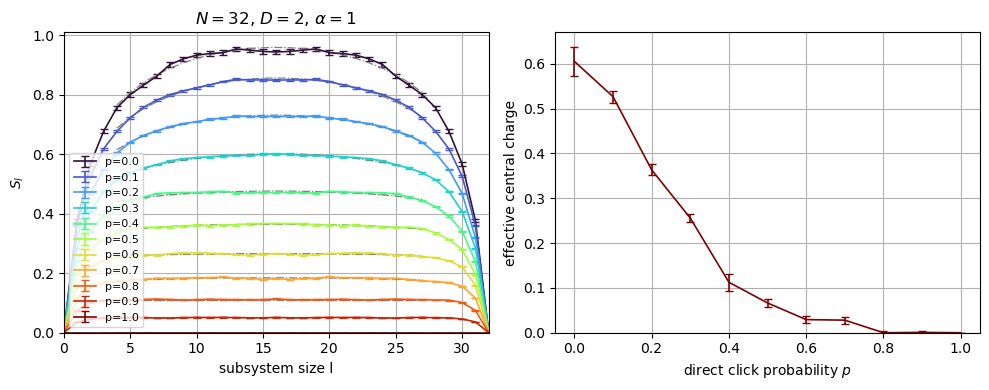

In [104]:
N_plot = 32
D_plot = 2
S_plot = 1

# function for critical fit
def log_scale(x,c,s0):
    return c/6.*(1.+1./S_plot)*np.log(2*N_plot/np.pi*np.sin(np.pi*x/N_plot)) + s0

offset = 4

# PLOTS: 2 panels: (1) subsystem entanglement profiles, (2) effective critical charge
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.style.use('default')

# FIRST PANEL
x_axis = np.linspace(0,N_plot,N_plot+1)
x_offset = x_axis[offset:-offset-1] # for fit, exclude boundaries

# find index in v_N array
i_N = np.argmin(np.abs(v_N-N_plot))
i_D = np.argmin(np.abs(v_D-D_plot))
i_S = np.argmin(np.abs(v_S-S_plot))

# for storing parameters
c_list = []
s0_list = []
c_err_list = []
s0_err_list = []

for i_p, p in list(enumerate(v_p)):
    dat = mean_S[i_N][i_p,i_D,i_S,:]
    err = err_S[i_N][i_p,i_D,i_S,:]
    
        
    _ = ax[0].errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr = err/np.sqrt(2), capsize=3, linewidth = 1.2, 
                     color=cmap(p/np.max(v_p)), label="p="+str(p))
    
    # perform fit and plot
    par,conv = curve_fit(log_scale, x_offset, dat[offset:-offset-1], bounds=(0, [20,20]))
    Sfit = log_scale(x_offset, par[0], par[1])
    _ = ax[0].plot(x_offset, Sfit, color="grey", linestyle="-.", linewidth=0.9)
    
    # save shit
    c_list.append(par[0])
    s0_list.append(par[1])
    c_err_list.append(np.sqrt(conv[0][0]))
    s0_err_list.append(np.sqrt(conv[1][1]))

ax[0].set_xlim(0,N_plot)
ax[0].set_ylim(bottom=0.)
ax[0].grid(True)
ax[0].legend(loc="lower left", fontsize=8)
ax[0].set_title(r"$N=$" + str(N_plot) + r", $D=$" + str(D_plot)+ r", $\alpha=$" + str(S_plot))

ax[0].set_xlabel("subsystem size l")
ax[0].set_ylabel(r"$S_l$")

# SECOND PANEL
ax[1].errorbar(v_p,c_list,yerr=c_err_list,capsize=3, linewidth = 1.2, 
                                    color=cmap(p/np.max(v_p)))

ax[1].set_ylim(bottom=0.)
ax[1].grid(True)
ax[1].set_xlabel(xlabel)
ax[1].set_ylabel("effective central charge")

plt.tight_layout()
#plt.savefig("subsystem_random.pdf")

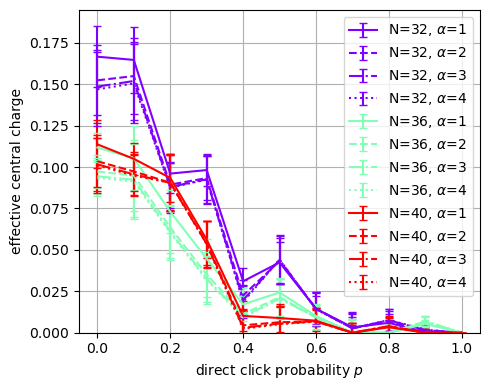

In [94]:
v_N_plot = [32,36,40] # N values to plot
v_S_plot = [1,2,3,4] # S values to plot (Renyi entropies)
offset = 4 # offset from boundary to do fit

D_plot = 2 # N layers
i_D = np.argmin(np.abs(v_D-D_plot))

S_linestyle = ['-','--','-.',':']


c_data = []
s0_data = []
c_err_data = []
s0_err_data = []

for N in v_N_plot:
    i_N = np.argmin(np.abs(v_N-N))
    
    c_list_N = []
    s0_list_N = []
    c_err_list_N = []
    s0_err_list_N = []
    
    for S in v_S_plot:
    
        i_S = np.argmin(np.abs(v_S-S))

        # function for critical fit
        def log_scale(x,c,s0):
            return c/6.*(1.+1./S)*np.log(2*N/np.pi*np.sin(np.pi*x/N)) + s0

        c_list_N_S = []
        s0_list_N_S = []
        c_err_list_N_S = []
        s0_err_list_N_S = []

        x_axis = np.linspace(0,N,N+1)
        x_offset = x_axis[offset:-offset-1] # for fit, exclude boundaries

        for i_p, p in list(enumerate(v_p)):
            dat = mean_S[i_N][i_p][i_D][i_S][:]
            err = err_S[i_N][i_p][i_D][i_S][:]

            # perform fit to data
            par,conv = curve_fit(log_scale, x_offset, dat[offset:-offset-1], bounds=(0, [20,20]))

            # save shit for this p fits for N
            c_list_N_S.append(par[0])
            s0_list_N_S.append(par[1])
            c_err_list_N_S.append(np.sqrt(conv[0][0]))
            s0_err_list_N_S.append(np.sqrt(conv[1][1]))
        c_list_N.append(c_list_N_S)
        s0_list_N.append(s0_list_N_S)
        c_err_list_N.append(c_err_list_N_S)
        s0_err_list_N.append(s0_err_list_N_S)
    # save for different N
    c_data.append(c_list_N)
    s0_data.append(s0_list_N)
    c_err_data.append(c_err_list_N)
    s0_err_data.append(s0_err_list_N)
    
# PLOT
plt.figure(figsize=(5,4))
cmap = matplotlib.cm.rainbow
for i_N, N in enumerate(v_N_plot):
    for i_S, S in enumerate(v_S_plot):
        plt.errorbar(v_p,c_data[i_N][i_S], yerr=c_err_data[i_N][i_S], capsize=3., linestyle=S_linestyle[i_S],
                     color=cmap((N-np.min(v_N_plot))/(np.max(v_N_plot)-np.min(v_N_plot))), 
                     label="N="+str(N)+r", $\alpha$="+str(S))

plt.ylim(bottom=0.)
plt.grid(True)
plt.legend()
plt.xlabel(xlabel)
plt.ylabel("effective central charge")

plt.tight_layout()
#plt.savefig("central_charge_same.pdf")

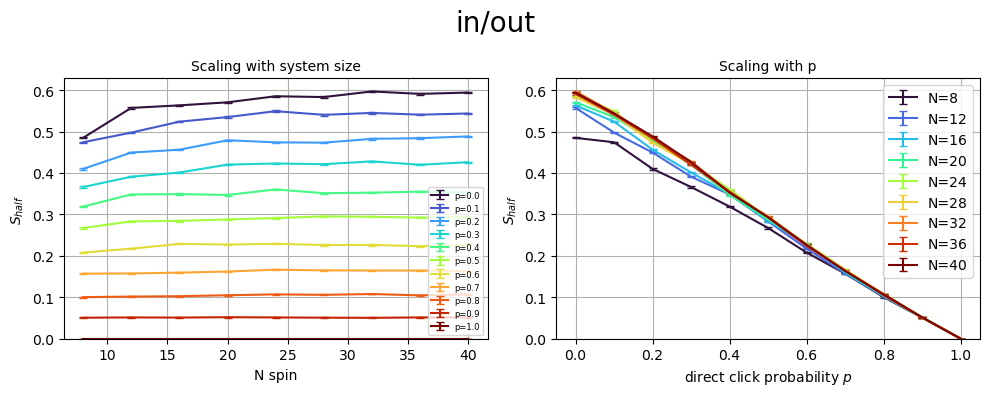

In [95]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.style.use('default')

# plotting colors
#p_plot = [.38,.4,.45,.5,.55,.6,.8]
#N_plot = [20,30,40,50,60]

v_p_plot = v_p
v_N_plot = v_N
S_plot = 1
D_plot = 2

i_S = np.argmin(np.abs(v_S-S_plot))
i_D = np.argmin(np.abs(v_D-D_plot))

p_min = np.min(v_p_plot)
p_max = np.max(v_p_plot)
N_min = np.min(v_N_plot)
N_max = np.max(v_N_plot)

# THE FIGURE
plt.suptitle("in/out", fontsize=20)
cmap = matplotlib.cm.turbo

# first panel:

x_axis = v_N

for p in v_p_plot:  
    i_p = np.argmin(np.abs(v_p-p))
    
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(mean_S[i_N][i_p][i_D][i_S], axis=None), mean_S[i_N][i_p][i_D][i_S].shape)
        dat_plot.append(mean_S[i_N][i_p][i_D][i_S][ind])
        dat_err.append(err_S[i_N][i_p][i_D][i_S][ind])

    _ = ax[0].errorbar(v_N,dat_plot, yerr=dat_err, capsize=3, 
                       color=cmap((p-p_min+1e-3)/(p_max-p_min+1e-3)), label="p="+str(p))


ax[0].set_ylim(bottom=0.)
#plt.xlim(v_N[0],v_N[3])
ax[0].grid(True)

ax[0].set_xlabel("N spin")
ax[0].set_ylabel(r"$S_{half}$")
ax[0].legend(loc="lower right",fontsize=6)
ax[0].set_title("Scaling with system size",fontsize=10)

# second panel

x_axis = v_p

for N in v_N_plot:
    i_N = np.argmin(np.abs(v_N-N))
    
    dat_plot = []
    dat_err = []
    
    for i_p in range(N_p):
        p = v_p[i_p]

        ind = np.unravel_index(np.argmax(mean_S[i_N][i_p][i_D][i_S], axis=None), mean_S[i_N][i_p][i_D][i_S].shape)
        dat_plot.append(mean_S[i_N][i_p][i_D][i_S][ind])
        dat_err.append(err_S[i_N][i_p][i_D][i_S][ind])

    #_ = ax[1].errorbar(x_axis,np.append(dat_plot,0.), yerr=np.append(dat_err,0.), capsize=3, 
                      #color=cmap((N-N_min)/(N_max-N_min)), label="N="+str(N))
    _ = ax[1].errorbar(x_axis,dat_plot, yerr=dat_err, capsize=3, 
                      color=cmap((N-N_min)/(N_max-N_min)), label="N="+str(N))


ax[1].set_ylim(bottom=0.)
#ax[1].set_xticks(x_axis)
#plt.xlim(v_N[0],v_N[3])
ax[1].grid(True)

ax[1].set_xlabel(xlabel)
ax[1].set_ylabel(r"$S_{half}$")
ax[1].legend()
ax[1].set_title("Scaling with p",fontsize=10)
fig.tight_layout()
#plt.savefig("scaling_same.pdf")